In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('rum.csv')

In [3]:
print(data.head())

   CSU_ID                  ITEM_NAME  YEAR  MONTH  CSU_AVG_PRICE  \
0  211101  Tuzemský tmavý (Tuzemák)   2020      1         278.57   
1  211101  Tuzemský tmavý (Tuzemák)   2020      2         255.23   
2  211101  Tuzemský tmavý (Tuzemák)   2020      3         276.44   
3  211101  Tuzemský tmavý (Tuzemák)   2020      4         258.26   
4  211101  Tuzemský tmavý (Tuzemák)   2020      5         254.80   

   ROHLIK_AVG_PRICE  KOSIK_AVG_PRICE  ITESCO_AVG_PRICE  ROHLIK_DIFF_FROM_CSU  \
0        292.485161       293.109677        268.419355            -13.915161   
1        290.608929       294.400000        273.958333            -35.378929   
2        310.207033       293.650000        266.483871            -33.767033   
3        302.914100       289.316667        271.583333            -44.654100   
4        303.166667       281.335484        267.411290            -48.366667   

   KOSIK_DIFF_FROM_CSU  ITESCO_DIFF_FROM_CSU  ROHLIK_MIN_PRICE  \
0           -14.539677             10.150645

In [4]:
data = data[['YEAR', 'MONTH', 'ITESCO_AVG_PRICE']]

In [5]:
print(data.head())

   YEAR  MONTH  ITESCO_AVG_PRICE
0  2020      1        268.419355
1  2020      2        273.958333
2  2020      3        266.483871
3  2020      4        271.583333
4  2020      5        267.411290


In [6]:
data['YEAR_MONTH'] = data.YEAR.astype(str) + '/' + data.MONTH.astype(str)

In [7]:
print(data.head())

   YEAR  MONTH  ITESCO_AVG_PRICE YEAR_MONTH
0  2020      1        268.419355     2020/1
1  2020      2        273.958333     2020/2
2  2020      3        266.483871     2020/3
3  2020      4        271.583333     2020/4
4  2020      5        267.411290     2020/5


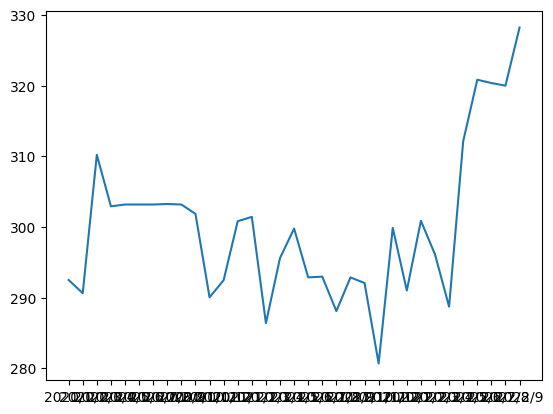

In [9]:
plt.plot(data['YEAR_MONTH'], data['ITESCO_AVG_PRICE'])
plt.show()

In [8]:
from sklearn import linear_model
X_train = data[['YEAR', 'MONTH']]
y_train = data[['ITESCO_AVG_PRICE']]

In [9]:
# Define the model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [10]:
# Generate forecast
d = {'YEAR': [2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023], 'MONTH': pd.Series([10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])}
X_val = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [11]:
# Generate forecast
y_val = linear_regression.predict(X_val)

In [12]:
X_val['ITESCO_AVG_PRICE'] = y_val

In [13]:
X_val['YEAR_MONTH'] = X_val.YEAR.astype(str) + '/' + X_val.MONTH.astype(str)

In [14]:
print(X_val.head())

   YEAR  MONTH  ITESCO_AVG_PRICE YEAR_MONTH
0  2022     10        263.549053    2022/10
1  2022     11        263.673972    2022/11
2  2022     12        263.798890    2022/12
3  2023      1        255.510159     2023/1
4  2023      2        255.635078     2023/2


In [15]:
df = pd.concat([data, X_val])
df.tail(20)

,YEAR,MONTH,ITESCO_AVG_PRICE,YEAR_MONTH
28,2022,5,246.906452,2022/5
29,2022,6,229.297895,2022/6
30,2022,7,250.381928,2022/7
31,2022,8,264.150526,2022/8
32,2022,9,279.068807,2022/9
0,2022,10,263.549053,2022/10
1,2022,11,263.673972,2022/11
2,2022,12,263.798890,2022/12
3,2023,1,255.510159,2023/1
4,2023,2,255.635078,2023/2


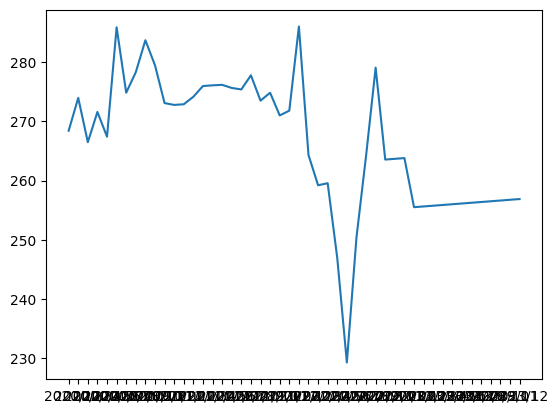

In [16]:
plt.plot(df['YEAR_MONTH'], df['ITESCO_AVG_PRICE'])
plt.show()